# Exploratory Analysis with Linear Regressions

Author: Daniel Dills


## Notebook Imports

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Import Data

In [19]:
df = pd.read_csv("us_states.csv", error_bad_lines=False)

/Users/dillsd/Documents/Projects/CodeFellows/code401/labs/linear-regression/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


## First five rows of data set

In [20]:
df.head(5)

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


## Ensuring date column of Data Frame is converted into Date Time object

In [21]:
df["date"] = pd.to_datetime(df["date"])
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27569 entries, 0 to 27568
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    27569 non-null  datetime64[ns]
 1   state   27569 non-null  object        
 2   fips    27569 non-null  int64         
 3   cases   27569 non-null  int64         
 4   deaths  27569 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
27564,2021-07-16,Virginia,51,684499,11477
27565,2021-07-16,Washington,53,461401,6093
27566,2021-07-16,West Virginia,54,164933,2919
27567,2021-07-16,Wisconsin,55,680034,8209


In [22]:
wa_state = df[df["state"] == "Washington"]
print(wa_state)

            date       state  fips   cases  deaths
0     2020-01-21  Washington    53       1       0
1     2020-01-22  Washington    53       1       0
2     2020-01-23  Washington    53       1       0
4     2020-01-24  Washington    53       1       0
7     2020-01-25  Washington    53       1       0
...          ...         ...   ...     ...     ...
27345 2021-07-12  Washington    53  458724    6051
27400 2021-07-13  Washington    53  459282    6070
27455 2021-07-14  Washington    53  460015    6076
27510 2021-07-15  Washington    53  460730    6086
27565 2021-07-16  Washington    53  461401    6093

[543 rows x 5 columns]


In [ ]:
# month_case = 

## Arranging Data

In [23]:
X = wa_state["date"].values
y = wa_state["cases"].values

## # of Cases

In [24]:
len(X)

543

Month / Year

In [25]:
len(y)

543

In [26]:
X = X.reshape(-1, 1)
print(X)

[[    0]
 [    1]
 [    2]
 [    4]
 [    7]
 [   11]
 [   15]
 [   19]
 [   23]
 [   27]
 [   31]
 [   36]
 [   41]
 [   46]
 [   51]
 [   56]
 [   62]
 [   68]
 [   74]
 [   80]
 [   86]
 [   92]
 [   99]
 [  106]
 [  113]
 [  120]
 [  127]
 [  135]
 [  143]
 [  151]
 [  159]
 [  167]
 [  175]
 [  183]
 [  191]
 [  200]
 [  209]
 [  218]
 [  228]
 [  238]
 [  251]
 [  266]
 [  282]
 [  299]
 [  320]
 [  348]
 [  381]
 [  416]
 [  453]
 [  492]
 [  536]
 [  583]
 [  634]
 [  686]
 [  739]
 [  792]
 [  845]
 [  899]
 [  953]
 [ 1007]
 [ 1061]
 [ 1115]
 [ 1169]
 [ 1223]
 [ 1277]
 [ 1331]
 [ 1385]
 [ 1440]
 [ 1495]
 [ 1550]
 [ 1605]
 [ 1660]
 [ 1715]
 [ 1770]
 [ 1825]
 [ 1880]
 [ 1935]
 [ 1990]
 [ 2045]
 [ 2100]
 [ 2155]
 [ 2210]
 [ 2265]
 [ 2320]
 [ 2375]
 [ 2430]
 [ 2485]
 [ 2540]
 [ 2595]
 [ 2650]
 [ 2705]
 [ 2760]
 [ 2815]
 [ 2870]
 [ 2925]
 [ 2980]
 [ 3035]
 [ 3090]
 [ 3145]
 [ 3200]
 [ 3255]
 [ 3310]
 [ 3365]
 [ 3420]
 [ 3475]
 [ 3530]
 [ 3585]
 [ 3640]
 [ 3695]
 [ 3750]
 [ 3805]
 

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2, random_state=100)

## Validate Shape of test/train data

In [28]:
print(f'x-train shape [{x_train.shape}]')

x-train shape [(434, 1)]


In [29]:
print(f'y-train shape [{y_train.shape}]')

y-train shape [(434,)]


In [30]:
print(f'x-test shape [{x_test.shape}]')

x-test shape [(109, 1)]


In [31]:
print(f'y-train shape [{y_train.shape}]')

y-train shape [(434,)]


## Plotting Data to display

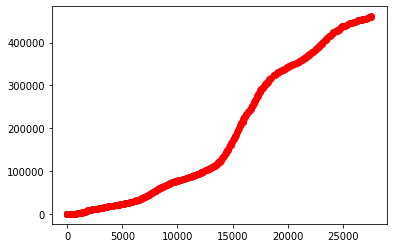

In [32]:
plt.scatter(x_train, y_train, color='red')